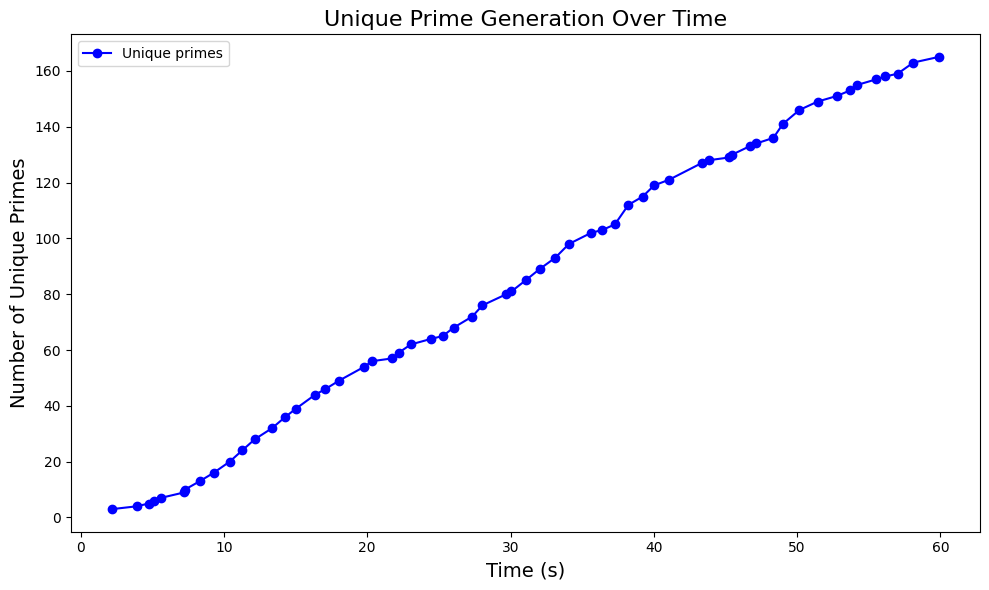

Generated 166 primes in 60 seconds.
Number of unique primes found: 165
Average generation time per prime: 0.3619 seconds


In [10]:
import random
import time
import matplotlib.pyplot as plt

def is_prime(n, k=10):
    """
    Miller-Rabin primality test to check if a number is prime.
    :param n: The number to check for primality.
    :param k: Number of iterations for accuracy.
    :return: True if n is probably prime, False otherwise.
    """
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0:
        return False

    # Write n-1 as 2^r * d
    r, d = 0, n - 1
    while d % 2 == 0:
        r += 1
        d //= 2

    # Miller-Rabin test
    for _ in range(k):
        a = random.randint(2, n - 2)
        x = pow(a, d, n)  # Compute a^d % n
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

def generate_large_prime(bits):
    """
    Generate a large prime number with the specified number of bits.
    :param bits: The bit-length of the prime number.
    :return: A large prime number.
    """
    while True:
        # Ensure the most significant bit is set (for exactly 'bits' bits) and that it's odd (LSB = 1)
        candidate = random.getrandbits(bits) | (1 << (bits - 1)) | 1
        if is_prime(candidate):
            return candidate

def benchmark_prime_generation(bits, duration=60, log_interval=1):
    """
    Continuously generate large primes of size 'bits' for 'duration' seconds.
    Every 'log_interval' seconds, record the size of the unique prime set.
    Return lists of (times, unique_counts) for plotting.
    """
    start_time = time.time()
    
    # Data lists
    timestamps = []
    unique_counts = []
    
    # Keep track of unique primes
    unique_primes = set()
    
    # Keep track of generation times for each prime (optional)
    generation_times = []
    
    # Next time at which we should log
    next_log_time = start_time + log_interval
    
    while True:
        # Check if we exceeded the total duration
        current_time = time.time()
        if current_time - start_time > duration:
            break
        
        # Generate a prime and measure how long it took
        gen_start = time.time()
        new_prime = generate_large_prime(bits)
        gen_end = time.time()
        
        # Record how long it took to generate
        generation_times.append(gen_end - gen_start)
        
        # Insert into the set of unique primes
        unique_primes.add(new_prime)
        
        # If we reached the log interval, record data
        if current_time >= next_log_time:
            timestamps.append(current_time - start_time)
            unique_counts.append(len(unique_primes))
            
            # Schedule the next log time
            next_log_time += log_interval
    
    return timestamps, unique_counts, generation_times, unique_primes

def plot_unique_primes_vs_time(times, counts):
    """
    Plot the number of unique primes vs. time.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(times, counts, marker='o', linestyle='-', color='blue', label='Unique primes')
    
    # Adding labels and title
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Number of Unique Primes', fontsize=14)
    plt.title('Unique Prime Generation Over Time', fontsize=16)
    plt.legend()
    
    # Optionally, you can customize more:
    # plt.ylim(bottom=0)
    # plt.xlim(left=0)
    
    plt.tight_layout()
    plt.show()


# Parameters
bits = 512          # Try with 512 bits; you can change to 1024 or 2048
duration = 60       # How many seconds to run the benchmark
log_interval = 1    # How frequently (in seconds) we log

# Run benchmark
times, counts, generation_times, primes = benchmark_prime_generation(bits, duration, log_interval)

# Plot the results
plot_unique_primes_vs_time(times, counts)

# Print some statistics
avg_gen_time = sum(generation_times) / len(generation_times)
print(f"Generated {len(generation_times)} primes in {duration} seconds.")
print(f"Number of unique primes found: {counts[-1] if counts else 0}")
print(f"Average generation time per prime: {avg_gen_time:.4f} seconds")



In [7]:
counts

[4, 7, 11, 13]

In [9]:
primes

{6833354413554253620319782651398487689920179483915955602071283559773873578192180124199419159227742920959661113774784953595308487032416823897057558680857401,
 7605042082129133327682447550959456171266120291512345012646164599151465100206783766012420798870600298101663503552308412583110098101298134143696309597700341,
 8917573395684381258449608386180306732393365290596618510248767043664582878633150442325470941966801126601113531639969988221090656388255764533754845536214571,
 9191466491421610114174409296289371377894813050182094486052621023162586578728223846075127808190065280004646342358514943146785328354168654019698646301326387,
 9367121370041283309301862003852758755501180384575470690256455675100951551031011480586348662816338228858357623163237738285261618684317319300637649965418261,
 9665757956719333595975176688196942285089885754626458771783777402866114109414361898045484774551547998615417937233145795710378399467906031084194314447689191,
 982258116707806700924409182389914703104312109510932997173

In [11]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


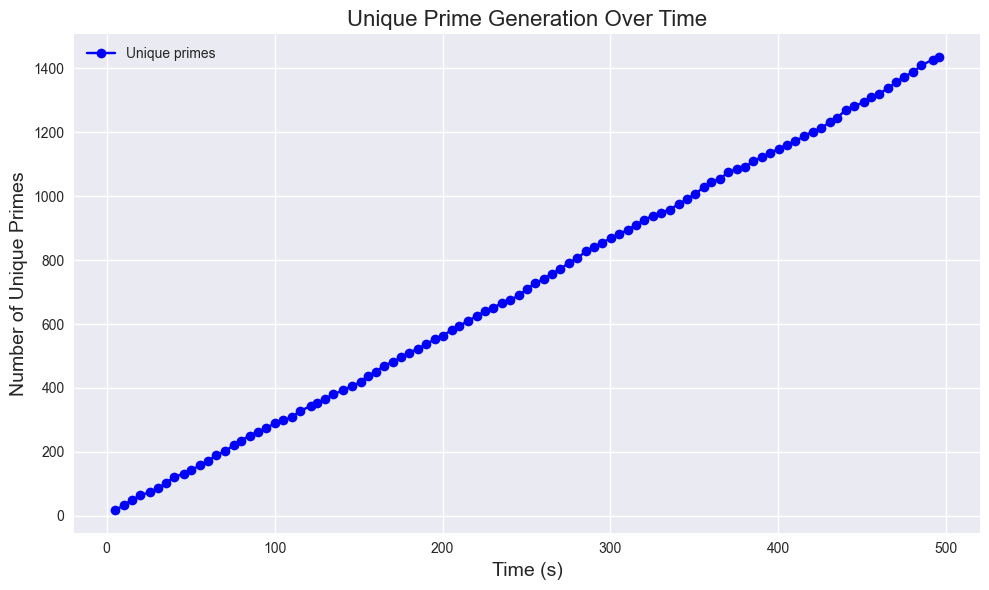

Generated 1449 primes in 500 seconds.
Number of unique primes found: 1435
Average generation time per prime: 0.3451 seconds


In [15]:
import random
import time
import matplotlib.pyplot as plt

def is_prime(n, k=10):
    """
    Miller-Rabin primality test to check if a number is prime.
    :param n: The number to check for primality.
    :param k: Number of iterations for accuracy.
    :return: True if n is probably prime, False otherwise.
    """
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0:
        return False

    # Write n-1 as 2^r * d
    r, d = 0, n - 1
    while d % 2 == 0:
        r += 1
        d //= 2

    # Miller-Rabin test
    for _ in range(k):
        a = random.randint(2, n - 2)
        x = pow(a, d, n)  # Compute a^d % n
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

def generate_large_prime(bits):
    """
    Generate a large prime number with the specified number of bits.
    :param bits: The bit-length of the prime number.
    :return: A large prime number.
    """
    while True:
        # Ensure the most significant bit is set (for exactly 'bits' bits) and that it's odd (LSB = 1)
        candidate = random.getrandbits(bits) | (1 << (bits - 1)) | 1
        if is_prime(candidate):
            return candidate

def benchmark_prime_generation(bits, duration=60, log_interval=1):
    """
    Continuously generate large primes of size 'bits' for 'duration' seconds.
    Every 'log_interval' seconds, record the size of the unique prime set.
    Return lists of (times, unique_counts) for plotting.
    """
    start_time = time.time()
    
    # Data lists
    timestamps = []
    unique_counts = []
    
    # Keep track of unique primes
    unique_primes = set()
    
    # Keep track of generation times for each prime (optional)
    generation_times = []
    
    # Next time at which we should log
    next_log_time = start_time + log_interval
    
    while True:
        # Check if we exceeded the total duration
        current_time = time.time()
        if current_time - start_time > duration:
            break
        
        # Generate a prime and measure how long it took
        gen_start = time.time()
        new_prime = generate_large_prime(bits)
        gen_end = time.time()
        
        # Record how long it took to generate
        generation_times.append(gen_end - gen_start)
        
        # Insert into the set of unique primes
        unique_primes.add(new_prime)
        
        # If we reached the log interval, record data
        if current_time >= next_log_time:
            timestamps.append(current_time - start_time)
            unique_counts.append(len(unique_primes))
            
            # Schedule the next log time
            next_log_time += log_interval
    
    return timestamps, unique_counts, generation_times, unique_primes

def plot_unique_primes_vs_time(times, counts):
    """
    Plot the number of unique primes vs. time.
    """
    plt.style.use('seaborn-v0_8')
    plt.figure(figsize=(10, 6))
    plt.plot(times, counts, marker='o', linestyle='-', color='blue', label='Unique primes')
    
    # Adding labels and title
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Number of Unique Primes', fontsize=14)
    plt.title('Unique Prime Generation Over Time', fontsize=16)
    plt.legend()
    
    # Optionally, you can customize more:
    # plt.ylim(bottom=0)
    # plt.xlim(left=0)
    
    plt.tight_layout()
    plt.show()


# Parameters
bits = 512          # Try with 512 bits; you can change to 1024 or 2048
duration = 500       # How many seconds to run the benchmark
log_interval = 5    # How frequently (in seconds) we log

# Run benchmark
times, counts, generation_times, primes = benchmark_prime_generation(bits, duration, log_interval)

# Plot the results
plot_unique_primes_vs_time(times, counts)

# Print some statistics
avg_gen_time = sum(generation_times) / len(generation_times)
print(f"Generated {len(generation_times)} primes in {duration} seconds.")
print(f"Number of unique primes found: {counts[-1] if counts else 0}")
print(f"Average generation time per prime: {avg_gen_time:.4f} seconds")



## Distribution of generation times

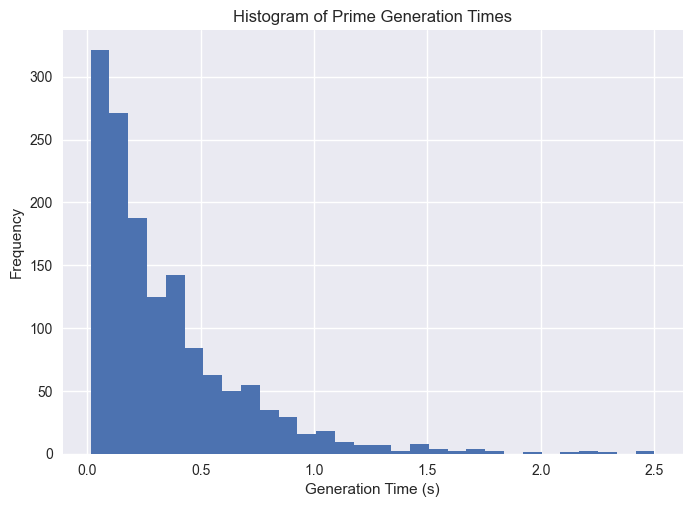

In [28]:
plt.hist(generation_times, bins=30)
plt.xlabel('Generation Time (s)')
plt.ylabel('Frequency')
plt.title('Histogram of Prime Generation Times')
plt.show()

## Testing different values of k (4, 6, 8, 10)

In [20]:
import random
import time
import matplotlib.pyplot as plt

###############################################################################
# 1) Implementation of Miller-Rabin for arbitrary k
###############################################################################
def miller_rabin_is_prime(n, k=10):
    """
    Miller-Rabin primality test to check if a number is prime.
    :param n: The number to check for primality.
    :param k: Number of rounds (iterations) for accuracy.
    :return: True if n is probably prime, False otherwise.
    """
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0:
        return False

    # Write (n-1) as (2^r) * d
    r, d = 0, n - 1
    while d % 2 == 0:
        r += 1
        d //= 2

    # Miller-Rabin test
    for _ in range(k):
        a = random.randint(2, n - 2)
        x = pow(a, d, n)  # a^d mod n
        if x == 1 or x == n - 1:
            continue
        for __ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

###############################################################################
# 2) Benchmark #1: Testing different values of k (4, 6, 8, 10)
###############################################################################
def test_miller_rabin_k_values(
    num_samples=200, 
    lower_bound=2**16, 
    upper_bound=2**17
):
    """
    1. Generate 'num_samples' random integers between lower_bound and upper_bound.
    2. For each random integer, test primality using k in [4,6,8,10].
    3. Use k=10 as 'ground truth' to detect false positives for k=4,6,8.
    4. Time how long each test takes, then plot (#samples processed) vs. cumulative time.
    """
    ks = [4, 6, 8, 10]
    
    # For each k, keep track of cumulative times and how many samples tested
    # cumulative_time[k] will be the total time spent so far, after i-th sample
    # sample_count[k] will be a list that tells us how many samples were tested
    # times[k] will be the time axis: times[k][i] = total test time up to i-th sample
    cumulative_time = {k: 0.0 for k in ks}
    sample_count = {k: [] for k in ks}
    times_axis = {k: [] for k in ks}
    
    # Count false positives for k=4,6,8 (compared to k=10)
    false_positives = {4: 0, 6: 0, 8: 0}
    
    # Generate samples
    random_samples = [random.randint(lower_bound, upper_bound) 
                      for _ in range(num_samples)]
    
    # Process each sample
    for i, val in enumerate(random_samples, start=1):
        # Determine ground truth (k=10)
        ground_truth_prime = miller_rabin_is_prime(val, k=10)
        
        for k in ks:
            # Time the primality check for this k
            start_t = time.time()
            is_prime_k = miller_rabin_is_prime(val, k=k)
            end_t = time.time()
            
            # Update cumulative time
            cumulative_time[k] += (end_t - start_t)
            
            # Store data for plotting
            times_axis[k].append(cumulative_time[k])
            sample_count[k].append(i)
            
            # Check if it is a false positive (for k < 10 only)
            if k != 10:
                # A false positive: k says prime but ground truth says composite
                if is_prime_k and (not ground_truth_prime):
                    false_positives[k] += 1

    # -------- PLOT: # of samples vs. time for each k -----------
    plt.figure(figsize=(8, 6))
    plt.title("Benchmark: Miller-Rabin with Different k Values")
    for k in ks:
        plt.scatter(
            times_axis[k], 
            sample_count[k], 
            label=f"k = {k}"
        )
    plt.xlabel("Cumulative Test Time (seconds)")
    plt.ylabel("Number of Samples Processed")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print the false positives for k=4,6,8
    print("False positives (compared to k=10 as ground truth):")
    for k in [4, 6, 8]:
        print(f"  k = {k}: {false_positives[k]} false positives out of {num_samples} samples.")


=== Benchmark 1: Different Miller-Rabin Rounds (k) ===


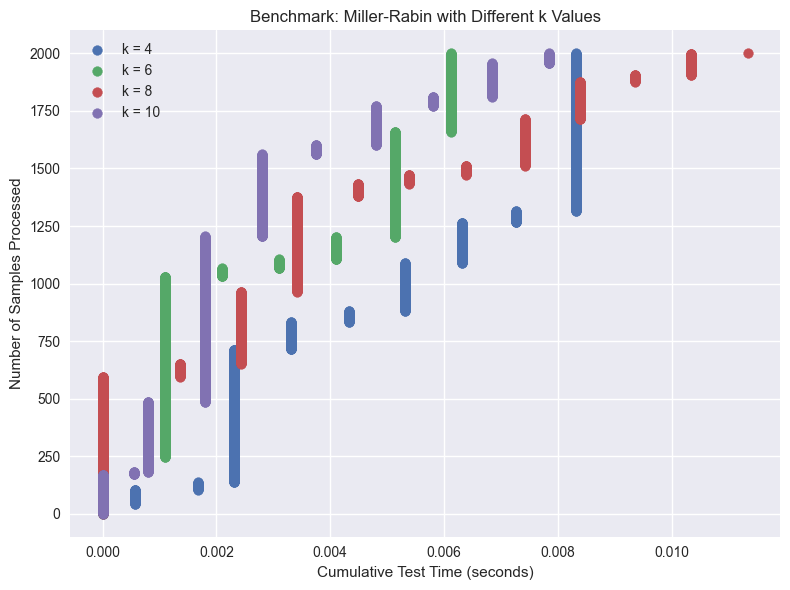

False positives (compared to k=10 as ground truth):
  k = 4: 0 false positives out of 2000 samples.
  k = 6: 0 false positives out of 2000 samples.
  k = 8: 0 false positives out of 2000 samples.


In [22]:
print("=== Benchmark 1: Different Miller-Rabin Rounds (k) ===")
test_miller_rabin_k_values(
    num_samples=2000,         # how many random integers to test
    lower_bound=2**16, 
    upper_bound=2**17
)

## Impact of key size (bit length) on prime generation time

In [25]:
###############################################################################
# 4) Benchmark #2: Impact of key size (bit length) on prime generation time
###############################################################################


def generate_large_prime(bits, k=10):
    """
    Generate a large prime number with the specified number of bits.
    :param bits: The bit-length of the prime number.
    :param k: Number of Miller-Rabin rounds (defaults to 10).
    :return: A large prime number.
    """
    while True:
        # getrandbits(bits) picks a random number in [0, 2^bits-1]
        # Set highest bit to ensure 'bits'-bit number; set LSB to 1 to ensure odd.
        candidate = random.getrandbits(bits) | (1 << (bits - 1)) | 1
        if miller_rabin_is_prime(candidate, k=k):
            return candidate


def benchmark_keysize_impact(
    bit_sizes = [256, 512, 1024], 
    duration=20,
    log_interval=5
):
    """
    For each bit size in 'bit_sizes', continuously generate primes for 'duration' seconds.
    Log the number of primes found vs time, then plot them on a single graph.

    :param bit_sizes: list of bit lengths to benchmark, e.g. [256, 512, 1024]
    :param duration: total time (in seconds) to attempt prime generation
    :param log_interval: how often we record (in seconds)
    """
    all_time_logs = {}   # all_time_logs[bits] = [t1, t2, ...]
    all_count_logs = {}  # all_count_logs[bits] = [c1, c2, ...]

    for bits in bit_sizes:
        start_time = time.time()
        next_log_time = start_time + log_interval
        
        count_logs = []
        time_logs = []
        
        prime_count = 0
        while True:
            current_t = time.time()
            if (current_t - start_time) >= duration:
                break
            
            # Generate one prime
            _ = generate_large_prime(bits, k=10)
            prime_count += 1
            
            # If we reached the next log interval, record data
            if current_t >= next_log_time:
                elapsed = current_t - start_time
                time_logs.append(elapsed)
                count_logs.append(prime_count)
                next_log_time += log_interval
        
        # Store result in dictionaries
        all_time_logs[bits] = time_logs
        all_count_logs[bits] = count_logs
    
    # ---- PLOT: # of primes generated vs. time for each bit size ----
    plt.figure(figsize=(9, 6))
    plt.title("Prime Generation: Impact of Key Size Over Time")
    
    for bits in bit_sizes:
        plt.plot(
            all_time_logs[bits],
            all_count_logs[bits],
            marker="o",
            label=f"{bits}-bit"
        )
    
    plt.xlabel("Time (seconds)")
    plt.ylabel("# of Primes Generated")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


=== Benchmark 2: Key Size Impact Over Time ===


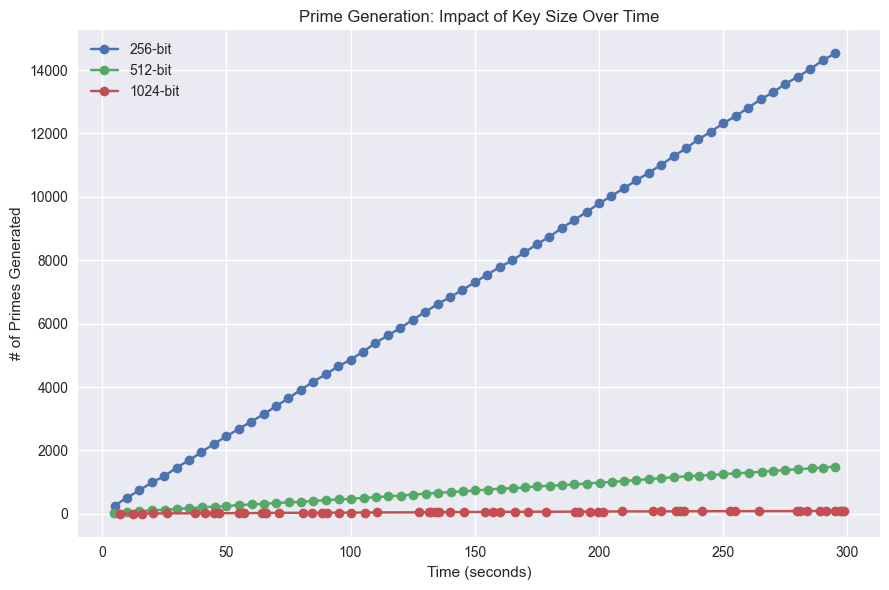

In [27]:
# 2) Benchmark #2: Impact of key size
print("\n=== Benchmark 2: Key Size Impact Over Time ===")
benchmark_keysize_impact(
    bit_sizes=[256, 512, 1024], 
    duration=300,  # how long to run each bit size test
    log_interval=5
)